In [1]:
# Load "autoreload" extension so that code can change; set it so modules are reloaded before execution
%load_ext autoreload
%autoreload 2

In [19]:
import os
import os.path as op

import numpy as np
import matplotlib.pyplot as plt

from wien2k_parse.core2 import Wien2kParse as w2k

In [59]:
import cProfile
thedir = '../data/raw/LaFeAsO/mreduce/76/LaFeAsO'
#cProfile.run("w2k(thedir).efg('As1')")
cProfile.run("w2k(thedir).magmom['Fe7']")

         226 function calls in 0.011 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.011    0.011 <string>:1(<module>)
       10    0.000    0.000    0.000    0.000 __init__.py:266(__getattr__)
        1    0.000    0.000    0.000    0.000 _bootlocale.py:33(getpreferredencoding)
        1    0.000    0.000    0.000    0.000 codecs.py:260(__init__)
        1    0.000    0.000    0.000    0.000 codecs.py:309(__init__)
        1    0.000    0.000    0.000    0.000 codecs.py:319(decode)
        1    0.000    0.000    0.000    0.000 core2.py:16(__init__)
        2    0.000    0.000    0.005    0.003 core2.py:26(final_iter)
       10    0.000    0.000    0.000    0.000 core2.py:58(species)
        1    0.000    0.000    0.000    0.000 core2.py:64(<listcomp>)
        1    0.000    0.000    0.011    0.011 core2.py:89(magmom)
        2    0.000    0.000    0.000    0.000 enum.py:289(__call__)
       

In [57]:
wien = w2k(thedir)
wien.magmom(), wien.species.index('Fe7')

({'int': -0.00013,
  'As1': -3e-05,
  'La2': -0.0,
  'O 3': 0.00136,
  'O 4': -0.00135,
  'O 5': -0.00136,
  'O 6': 0.00134,
  'Fe7': 0.70967,
  'Fe8': -0.6979,
  'Fe9': -0.71003,
  'Fe10': 0.69884,
  'tot': 0.00027},
 6)

In [64]:
case = 'LaFeAsO'
head_dir = op.abspath('../data/raw/LaFeAsO')

efg_data = {}
magmom_data = {}
for pCo in ['0.00']:
    perc_dirs = next(os.walk(op.join(head_dir, 'mreduce')))[1]
    efg_data[pCo] = np.zeros((len(perc_dirs), 3))
    magmom_data[pCo] = np.zeros(len(perc_dirs))
    for i, perc in enumerate(perc_dirs):
        data_dir = op.join(head_dir, 'mreduce', perc, case)
        wien = w2k(data_dir)
        efg = wien.efg('As1')['As1'].gac_tensor
        magmom_data[pCo][i] = wien.magmom['Fe7']
        efg_data[pCo][i, :] = np.array([efg[0, 0], efg[1, 1], efg[2, 2]])

Text(0.5, 0, 'Fe moment $ \\mu_\\mathrm{B} $')

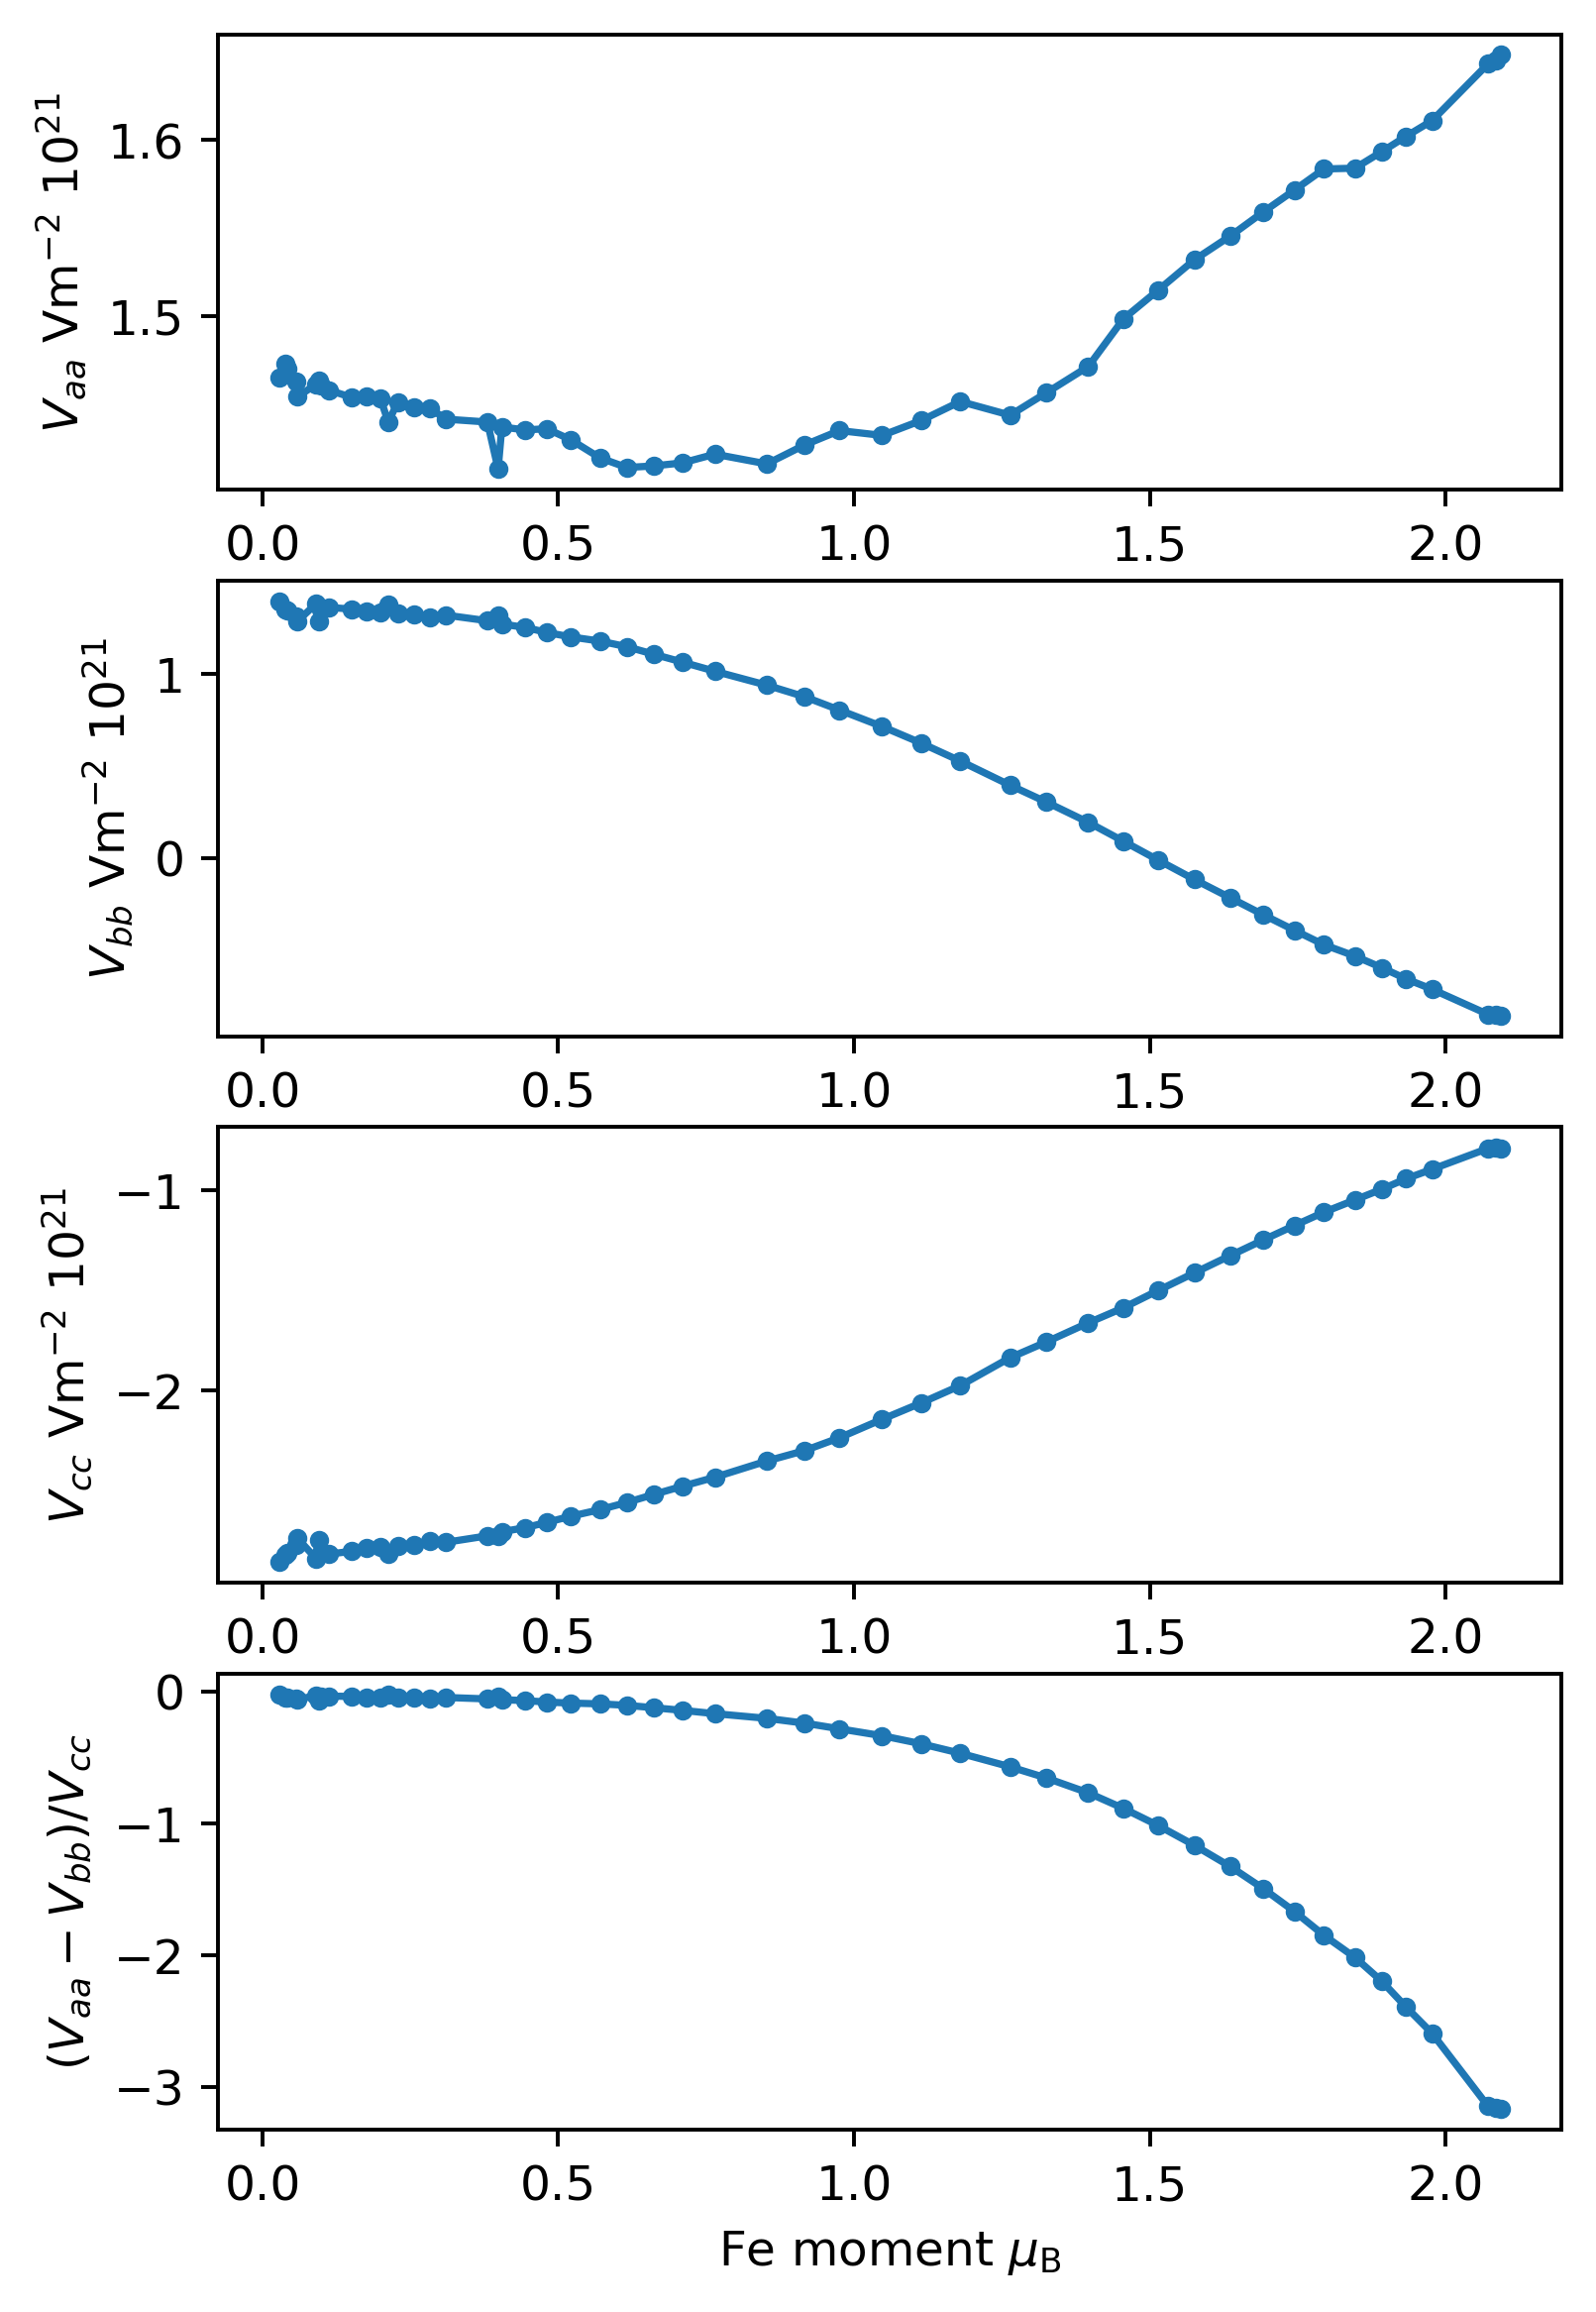

In [65]:
fig, axs = plt.subplots(4, dpi=350, figsize=(5, 8))
labels = {'0.02': '2% Co', '0.08': '8% Co', '0.00': '0% Co'}
pCos = ['0.00']
for pCo in pCos:
    order = np.argsort(magmom_data[pCo])
    magmom = magmom_data[pCo][order]
    Vaa = efg_data[pCo][:, 0][order]/1e21
    Vbb = efg_data[pCo][:, 1][order]/1e21
    Vcc = efg_data[pCo][:, 2][order]/1e21
    eta = (Vaa - Vbb)/Vcc#efg_data[pCo][:, 3][order]
#    plt.plot(magmom, Vaa)
#    plt.plot(magmom, Vbb)
    axs[0].plot(magmom, Vaa, '.-', label=labels[pCo])
    axs[1].plot(magmom, Vbb, '.-', label=labels[pCo])
    axs[2].plot(magmom, Vcc, '.-', label=labels[pCo])
    axs[3].plot(magmom, eta, '.-', label=labels[pCo])
    #plt.plot(magmom, eta)
axs[0].set_ylabel(r'$ V_{aa}$ Vm$^{-2}$ 10$^{21}$')
axs[1].set_ylabel(r'$ V_{bb}$ Vm$^{-2}$ 10$^{21}$')
axs[2].set_ylabel(r'$ V_{cc}$ Vm$^{-2}$ 10$^{21}$')
axs[3].set_ylabel(r'$ (V_{aa} - V_{bb})/V_{cc} $')
axs[3].set_xlabel(r'Fe moment $ \mu_\mathrm{B} $')
#axs[0].legend()